In [1]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

'Army Project Budget.gsheet'
 assgn2
'Bird Speciees Dataset'
 bird_species.h5
'Colab Notebooks'
'Computational Optimal Transportwith Applications to Data Sciences.pdf'
 Convolutional_Neural_Networks_in_Python_B.pdf
'Copy of Briefcase Document.gdoc'
'Copy of Direct Recruiter Email.gdoc'
 CV-Sehtab.pdf
"Dr. Rahman's equipment.gsheet"
"Dr.Rahman's Lab Equipment.gsheet"
"Dr.Rahman's LAb Equipment list.gsheet"
'ECE-226 HW1_grades.gsheet'
"ECE-227-Fall'19.gsheet"
'ECE-227 Fall2020.gsheet'
 ECE-227-Spring19.gsheet
'ECE-227 Spring2020.gsheet'
'ECE-228 HW-1 Grades.gsheet'
 EColi-encoder.pickle
 E-Coli_model.pickle
'Final Project ECE-227 2L.gsheet'
'Final Project ECE-227 8L.gsheet'
'Final Project Ece-227 9L.gsheet'
 genesis-i-INTv-.pdf
 icp10dl3
'Intel Image Dataset'
 intel_image.h5
 learners.gdoc
'Liberation Day Cost.gsheet'
'Logic Design-5L-Wednesday.gsheet'
'Logic Design Lab-8L-Tuesday .gsheet'
'Monthly budget (1).gsheet'
'Monthly budget (2).gsheet'
'Monthly budget.gsheet'
'Nanofabrication Pr

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

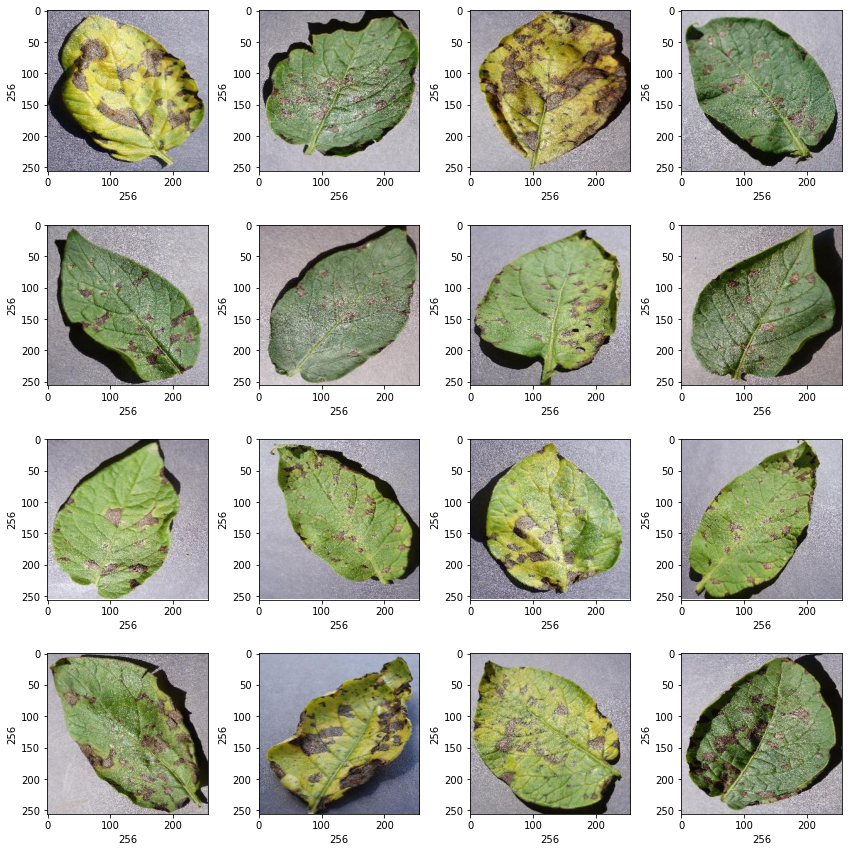

In [34]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [35]:
# converting image to array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [36]:
dir = "/content/drive/My Drive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1
# reading and converting image to numpy array
for directory in root_dir:
  plant_image_list =  listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [37]:
# visualize the number of classes count (to see if the dataset is balanced or not)
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [38]:
# check the shape of the image
image_list[0].shape

(256, 256, 3)

In [39]:
# check the total number of images
label_list = np.array(label_list)
label_list.shape

(900,)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.25, random_state=50)


In [41]:
# normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)


In [42]:
# applying One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#**Model Building**

In [43]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 112896)            0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [44]:
# during compilation of the model, need to be set the type of loss: Binary Crossentropy along with optimizers and the metrics
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [45]:
# Slitting the training data set into training anad validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)

In [46]:
# fitting the the model with data and finding out the accuracy at each epoch to see how the model is learning
epochs = 30
batch_size = 128
history = model.fit(x_train,y_train, batch_size= batch_size, epochs = epochs, validation_data= (x_val, y_val))

Epoch 1/30
5/5 [==============================] - 37s 7s/step - loss: 1.0371 - accuracy: 0.4981 - val_loss: 0.6856 - val_accuracy: 0.6074
Epoch 2/30
5/5 [==============================] - 37s 7s/step - loss: 0.5735 - accuracy: 0.6667 - val_loss: 0.4585 - val_accuracy: 0.9481
Epoch 3/30
5/5 [==============================] - 43s 9s/step - loss: 0.4411 - accuracy: 0.7463 - val_loss: 0.4171 - val_accuracy: 0.7111
Epoch 4/30
5/5 [==============================] - 37s 7s/step - loss: 0.3615 - accuracy: 0.8704 - val_loss: 0.3161 - val_accuracy: 0.9333
Epoch 5/30
5/5 [==============================] - 38s 7s/step - loss: 0.2872 - accuracy: 0.9259 - val_loss: 0.2985 - val_accuracy: 0.9037
Epoch 6/30
5/5 [==============================] - 41s 8s/step - loss: 0.2484 - accuracy: 0.9259 - val_loss: 0.2330 - val_accuracy: 0.9407
Epoch 7/30
5/5 [==============================] - 40s 8s/step - loss: 0.2276 - accuracy: 0.9370 - val_loss: 0.2189 - val_accuracy: 0.9185
Epoch 8/30
5/5 [==================

In [47]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model in json
json_model = model.to_json()
# save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
  json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/Plant_model_weights.h5')

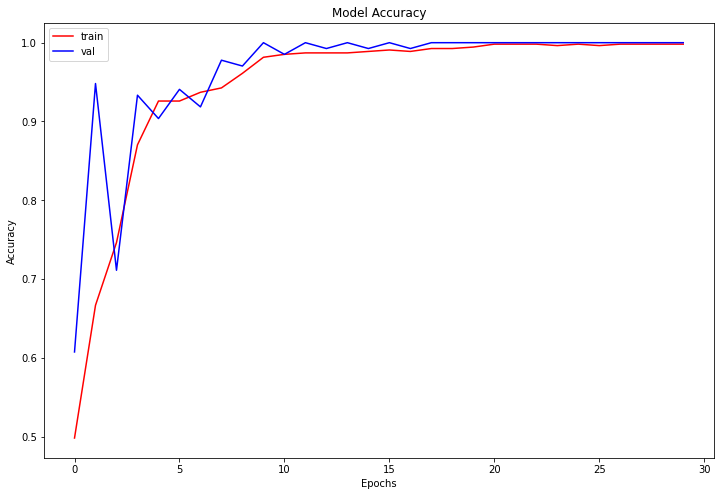

In [48]:
# plot the training history, plot the accuracy of the training
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

In [49]:
# Evaluate the model to find the accuaracy of the model
print('[INFO] Calculating model accuracy')
scores = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {scores[1]*100}')

[INFO] Calculating model accuracy
8/8 [==============================] - 11s 1s/step - loss: 0.0320 - accuracy: 0.9911
Test Accuracy: 99.11110997200012


In [50]:
# predict the testing dataset
y_pred = model.predict(x_test)

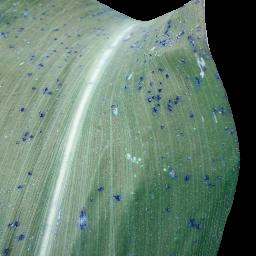

In [51]:
# plotting image to compare
img = array_to_img(x_test[10])
img

In [52]:
# finding max value from predition list and comparing original value vs predicted
print('Originally : ', all_labels[np.argmax(y_test[10])])
print('Predicted : ', all_labels[np.argmax(y_pred[10])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust
